<a href="https://colab.research.google.com/github/sanjzreddy/OIBSIP/blob/main/Email_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('spam.csv',encoding="latin-1")

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

In [6]:
data=data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
data.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

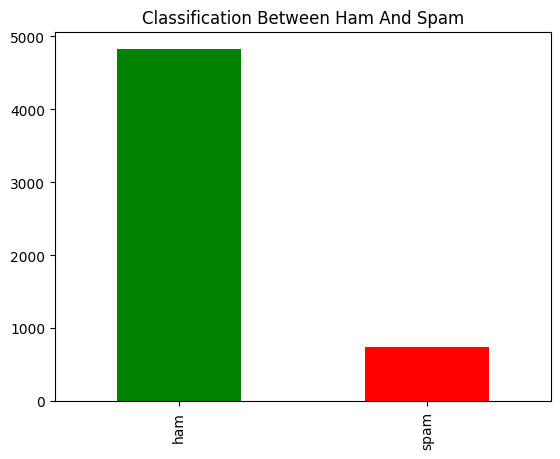

In [9]:
import matplotlib.pyplot as plt
df2=pd.value_counts(data["v1"])
df2.plot(kind="bar",color= ["green", "red"])
plt.title("Classification Between Ham And Spam")
plt.show()

In [10]:
for i in range(0,5572):
    if data['v1'][i]=='spam':
        data['v1'][i]=1
    else:
        data['v1'][i]=0

In [11]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
x=data.iloc[:,-1]
y=data.iloc[:,:-1]

In [13]:
y.head()

,v1
0,0
1,0
2,1
3,0
4,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [16]:
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True )

In [17]:
x_train_features =feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)

In [18]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [19]:
print(x_train_features)

  (0, 6566)	0.29071829686789585
  (0, 5260)	0.5087678982336444
  (0, 4010)	0.4050685955975014
  (0, 6073)	0.5665799184805557
  (0, 5169)	0.4141795823412651
  (1, 2116)	0.3523355719340784
  (1, 1423)	0.5940444343697558
  (1, 6859)	0.4124100686677272
  (1, 3141)	0.5940444343697558
  (2, 3565)	0.40508027557608417
  (2, 5897)	0.440107047813195
  (2, 4140)	0.440107047813195
  (2, 2845)	0.3382880530026162
  (2, 6332)	0.440107047813195
  (2, 2258)	0.3104925886287087
  (2, 3910)	0.20972094634778068
  (3, 2105)	0.17893490557083572
  (3, 7191)	0.2812743655569581
  (3, 1763)	0.2431679156261037
  (3, 6620)	0.2114722422733664
  (3, 6461)	0.2757210982911898
  (3, 7045)	0.20776132213481782
  (3, 4865)	0.26062868324883703
  (3, 2251)	0.2952674814882996
  (3, 5175)	0.3101007821209402
  :	:
  (4451, 4355)	0.5653315538937795
  (4452, 6856)	0.8442476281269602
  (4452, 4003)	0.5359533024452802
  (4453, 7234)	0.3927126429320925
  (4453, 4634)	0.3513960490954625
  (4453, 4498)	0.36145784624804855
  (4453, 35

In [20]:
lr=LogisticRegression()

In [21]:
lr.fit(x_train_features,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [22]:
predict_train=lr.predict(x_train_features)
accuracy_on_training=accuracy_score(y_train,predict_train)

In [23]:
print(accuracy_on_training)

0.971729863136639


In [24]:
predict_test=lr.predict(x_test_features)
accuracy_on_test=accuracy_score(y_test,predict_test)

In [25]:
print(accuracy_on_test)

0.9560538116591928


In [26]:
def SpamHam(x):
  input=[x]
  input_features=feature_extraction.transform(input)
  predict_input=lr.predict(input_features)
  if predict_input==0:
    return 'Spam Mail'
  else:
    return 'Ham Mail'

In [27]:
SpamHam(''' ''')

'Spam Mail'